## Project: Predicting Boston Housing Prices

### Getting Started

This project was completed as a part of the Machine Learning Engineer Nanodegree from Udacity

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. We will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


### Data Exploration
In this first section of project, we will make a cursory investigation about the Boston housing data. This will help us to get familiarize with the data through an explorative process to better understand the results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Calculating Statistics
For our very first coding implementation, we will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for us, we will use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, we need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
- Store each calculation in their respective variable.

In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observations
We are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. 
For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


Just by intuition, for each of the three features above, let’s try to figure out if an increase in the value of a feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`.

**‘RM’**: An increase in the value of `'RM'` will lead to an increase in the value of `'MEDV'`. This is because for you’d aurely expect a home with a more number of rooms must be more expensive than a home with less number of rooms.

**‘LSTAT’**: An increase in the value of `'LSTAT'` will lead to a decrease in the value of `'MEDV'`. A lower class homeowner might not be able to afford expensive houses, so you’d expect them to leave in a cheaper home. A higher percentage of such people could correlate to cheaper homes in an area, and thus, a lower `'MEDV'` value.

**‘PTRATIO’**: An increase in the value of `'PTRATIO'` will lead to an decrease in the value of `'MEDV'`. A lower student to teacher ratio is typically associated with better education level of a school, as a teacher is able to focus on individual students better (than if there were more students). So, due to the presence of better quality schools, people might be willing to pay more to live in those areas, to provide their children with better education, and the prices might be higher.
We can build scatterplots to see if our intuition is correct.

Let us build scatter plots for each feature vs price to check whether our intution is right or not

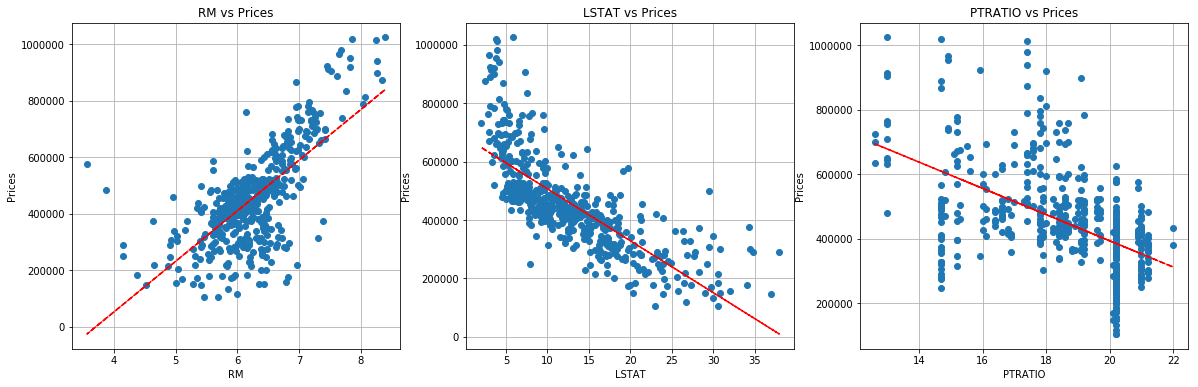

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    x = features[col]
    y = prices
    plt.plot(x, y, 'o')
    
    z = np.polyfit(features[col], prices, 1)
    p = np.poly1d(z)
    plt.plot(features[col], p(features[col]),"r--")

    plt.grid()
    plt.title(col + ' vs Prices')
    plt.xlabel(col)
    plt.ylabel('Prices')

**Above three scatter plots shows that our intution was right**

----
## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Defining a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

Let's implement a `performance_metric` function using `r2_score` from `sklearn.metrics` in the below code cell.

In [4]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Let's use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


***The above R2 score shows that the model successfully captures more than 92 percent of the variation in the target variable.***

### Shuffle and Split Data
Now we will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [6]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=33)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


By splitting the dataset into training and testing subsets we can train the model on train subset of dataset and later test it on test subset. 

Generaly the train subset contains most (i.e. 70-80%) of data so that model can recognise the underlying pattern and train the model in more generalise way. This will help us to have better prediction and can avoid overfitting or underfitting.

----

## Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

**Note:** The section uses helper functions i.e. ‘visuals’ module, supplied with this project.

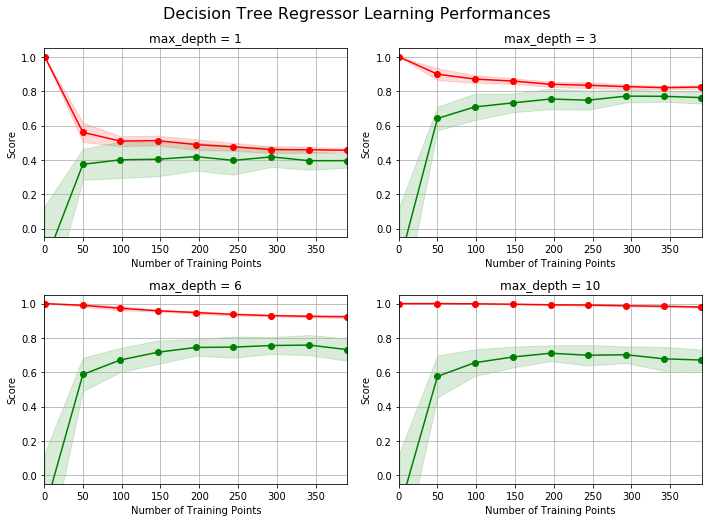

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

**Considering learning curve of model with Maximum Depth = 3**

* For given depth value, as more training points are added to the model the score of training curve slowly starts decreasing  

* There is a instant increase in testing score from 0 to 0.7 for first 50 data points and then it is gradually increasing for further addition of data points.

* The training and testing curve seems to be converging to a score of 0.8

Therefore, having more training point will surely not benefits the model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.

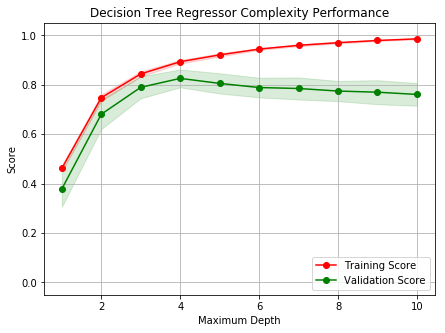

In [8]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

* **Model trained with max_depth of 1:** The model suffers from high bias at this depth. Looking at the graph, we can see that both training and validation scores are low. The model is over-simplified or underfitted and is not capturing the underlying relationships present in the data for both training and validation datasets.


* **Model trained with max_depth of 10:** The model suffers from high variance at this depth, and is overfitted to the training data. In the graph, we can see that the training score at this depth is almost equal to 1.0, while the validation score is lower, at around 0.75. The curves also seem to be diverging away from each other at this point.

### Best-Guess Optimal Model

**A model with Maximum depth = 4** results to be a best model that can generalizes the unseen data well. 

This depth is the perfect harmony spot for model complexity, as our model performs similar on training and validation data, while the overall score for both is still relatively high at between 0.8 to 0.9.

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search

The grid search technique allows us to define a grid of parameters that will be searched using K-fold cross-validation. Mainly, the grid search technique exhaustively tries every combination of the provided hyper-parameter values in order to find the best model. We can then find the highest cross-validation accuracy that matches with the corresponding parameters that optimizes the learning algorithm.

### Cross-Validation

The k-fold cross-validation technique is a way of splitting the dataset into k partitions of equal size, and then running k separate learning experiments on the training data. In each of the experiment, we chose a training set of the size k-1, train our model on that partition, and evaluate the results on the remaining test data. The scores of the k experiments are then averaged to get the final score value.

This technique is benefitial when using with grid search to optimize a model because it allows us to look for best parameter settings that perform well for different test sets. If we had a single testing set, it’s easy to tune a model to perform well for that specific test set (and result in overfitting on the test set in this case), while cross validation allows us to generalize the results.

### Fitting a Model
Now we will bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In [9]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating a cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Creating a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Creating a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Creating the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Returning the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**.

### Optimal Model

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**The optimal model has a Max depth = 4,** which is exactly what we guessed from the model complexity curve

### Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

Let’s see what prices our model will predict for these clients to sell their home, and also whether it is reasonable for the respective features

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $409,400.00
Predicted selling price for Client 2's home: $229,682.35
Predicted selling price for Client 3's home: $938,053.85


The prices seem to be reasonable for given the features of the homes. As observed, the highest priced home has the most rooms, lowest neighbourhood poverty level, and the lowest student-teacher ratio, all of which make intuitive sense. On the contrary, the home with the lowest number of rooms, highest neighbourhood poverty level, and highest student-teacher ratio is priced the lowest in our predictions.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability
* The data collected in 1978 is not really relevant today due to rising population levels and changing population density of different areas.

* The features present in the data that we built our model on are not likely be sufficient to describe a home. Examples of interesting features to look at may be quality of apppliances in the home, square feet of the plot area, presence of pool or not, proximity to city center, or neighbourhood crime rate etc.

* The data collected in an urban city will not be applicable in a rural city, because the people might value different aspects of a home depending on whether they live in an urban city or a rural area. For example, a person living in a rural city might value number of rooms in a home over the proximity to the city.

* It is not fair to judge the price of an individual home based on the characteristics of the entire neighborhood